In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['Target'] = data.target


In [50]:
# Display first few rows
print("\n First 5 Rows:")
print(df.head())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Descriptive statistics
print("\n Statistical Summary:")
print(df.describe())

# Correlation matrix
print("\n Correlation Matrix:")
print(df.corr())



 First 5 Rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

 Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

 Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486

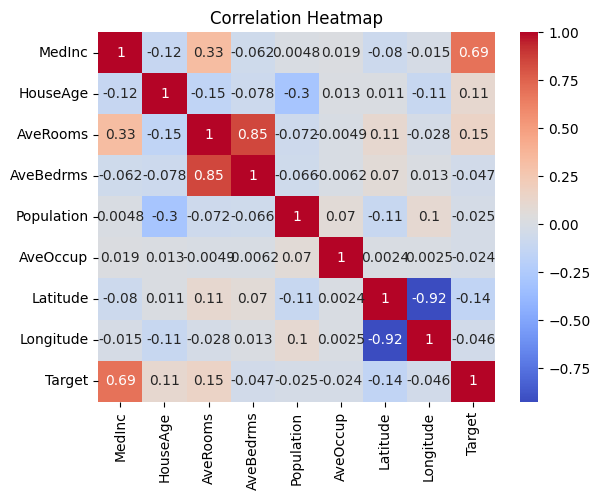

In [51]:

import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [52]:
x = df.drop(columns='Target')
y = df['Target']
x.shape,y.shape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=34)
from xgboost import XGBRegressor

y_scaler = StandardScaler()
ytrain_scaled = y_scaler.fit_transform(ytrain.values.reshape(-1, 1)).ravel()
ytest_scaled = y_scaler.transform(ytest.values.reshape(-1, 1)).ravel()

In [54]:


model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) 
model.fit(xtrain,ytrain_scaled)
ypred = model.predict(xtest)
from sklearn.metrics import r2_score, mean_absolute_error

print('r2_score:',r2_score(y_pred=ypred,y_true=ytest_scaled))
print('mean_absolute_error:',mean_absolute_error(ypred,ytest_scaled))


r2_score: 0.7989114546533973
mean_absolute_error: 0.31318366903657546


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=1)
grid.fit(xtrain, ytrain_scaled)

print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [41]:
grid.best_score_

np.float64(0.8372578746210984)

In [42]:
grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
grid.best_index_

np.int64(35)

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain_scaled)
print("Linear Regression R2:", r2_score(ytest, lr.predict(xtest)))


Linear Regression R2: -2.582394755026792


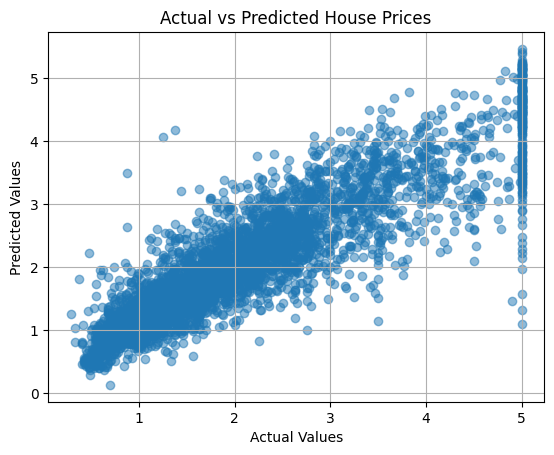

In [45]:
plt.scatter(ytest, ypred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
